# Finding maps (at scale) with computer vision and Jupyter notebooks 

Author: Daniel van Strien <a itemprop="sameAs" content="https://orcid.org/0000-0003-1684-6556" href="https://orcid.org/0000-0003-1684-6556" target="orcid.widget" rel="me noopener noreferrer" style="vertical-align:top;"><img src="https://orcid.org/sites/default/files/images/orcid_16x16.png" style="width:1em;margin-right:.5em;" alt="ORCID iD icon">https://orcid.org/0000-0003-1684-6556</a>

Credit: *This project, funded by the UK Research and Innovation (UKRI) Strategic Priority Fund, is a multidisciplinary collaboration delivered by the Arts and Humanities Research Council (AHRC), with The Alan Turing Institute, the British Library and the Universities of Cambridge, East Anglia, Exeter, and Queen Mary University of London.*

## What this notebook aims to cover:

- An approach for 'finding' maps in a collection of images 
- How Jupyter notebook can support us in our quest for finding maps 
- A (very) brief intro to computer vision 
- A brief suggested approach for scaling 

## What this notebook doesn't aim to do:
- It's not a full tutorial on all the methods involved
- It's isn't intended to show the best/most optimal approach, instead it's intended to show what is possible. 

# Emoji Key
I like to have an excuse to use emojis 🤷‍♂️. A key below explains what these emojis are supposed to indicate in the headings 

- 🧙🏽‍♀️ Is used to indicate a 'trick' for working with Jupyter notebooks
- ‼️ is a 'warning' for something to watch out for
- 🤖 robot is discussion points about ai and/or working at scale
- 📸 is stuff about computer computer vision 

## Jupyter Notebooks 

Jupyter notebook are ["an open-source web application that allows you to create and share documents that contain live code, equations, visualizations and narrative text. Uses include: data cleaning and transformation, numerical simulation, statistical modeling, data visualization, machine learning, and much more."](https://jupyter.org/)

### Using notebooks vs working in notebooks 
It is possible to work inside Jupyter notebooks without using any of it's extra magic. This is perfectly fine but in this notebook/workshop I will focus specifically on some of the features of Jupyter notebooks which make it useful both as a coding environment for this type of work, but also as a potential interface for other people to interact with collections. 

## Let's find some maps!
First we'll install some packages which aren't already available in Colab. We often define all of our imported python packages at the start of a notebook/script but in this notebook I will try and import things as we begin using them so it is clearer where these packages are used. 

In [ ]:
%pip install numpy==1.23

In [ ]:
%pip install -q fastai --upgrade
%pip install -U -q ipywidgets
%pip install -q pigeonXT-jupyter

In [ ]:
%jupyter nbextension enable --py widgetsnbextension

Config option `kernel_spec_manager_class` not recognized by `EnableNBExtensionApp`.
Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK


## Make sure we have GPU turned on 
If using in colab, use the `runtime` tab and choose `change runtime type` choose the GPU option. If you run the cell below you should get back `True`


In [ ]:
import torch
torch.cuda.is_available()

In [169]:
%matplotlib inline

# The Dataset: finding maps in newspapers

<img align="right" src="https://news-navigator.labs.loc.gov/static/labs/work/experiments/images/nnavigator-logo-cropped.jpg"/>

We will work with images which are derived from the "Newspaper Navigator" dataset. This is a dataset of extracted visual content for 16,358,041 digitised historic newspaper pages drawn from the Library of Congress Chronicling America collection and placed into one of seven categories, including photographs, advertisements and maps. 

The Newspaper Navigator data was created using an object detection deep learning model. This model was trained on annotations of World War 1-era Chronicling America pages, including annotations made by volunteers as part of the Beyond Words crowdsourcing project. 

The dataset also includes quite a bit of metadata about where the image came from including;
- Publication Date
- OCR
- Place of Publication
- Geographic Coverage, Newspaper Name
- Newspaper Publisher. 

The Library of Congress has a [project page](https://news-navigator.labs.loc.gov/) which includes more details about this collection. 

In this notebook we'll work with some of these images predicted as being maps. 

## 🧙🏽‍♀️ Using bash commands

First we'll download a sample of images from this dataset. We can do this using `wget` a bash/command line tool for downloading things from the web. In Jupyter we can access Bash/command line by using the `!` symbol at the start of the relative command. This can be very useful as a way of accessing tools which may be quicker/easier to use than writing some equivalent python code. It can also be useful if you have existing tools for working with collection which are available as command line tools but not in Python. 

In [3]:
!wget -O newspaper_maps.zip https://zenodo.org/record/4156510/files/newspaper_maps.zip?download=1

--2020-11-05 10:26:39--  https://zenodo.org/record/4156510/files/newspaper_maps.zip?download=1
Resolving zenodo.org (zenodo.org)... 137.138.76.77
Connecting to zenodo.org (zenodo.org)|137.138.76.77|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 314305730 (300M) [application/octet-stream]
Saving to: ‘newspaper_maps.zip’

newspaper_maps.zip  100%[===================>] 299.75M  11.9MB/s    in 25s     

2020-11-05 10:27:05 (12.1 MB/s) - ‘newspaper_maps.zip’ saved [314305730/314305730]



We can unzip the directory using the `unzip` command. 

In [4]:
!unzip -q newspaper_maps.zip

## Exploring our data

There are many nice features of Jupyter notebooks but a particularly useful one for us it the ability to easily view images. Since we'll be trying to use computer vision this will be particularly helpful. 

## Building interfaces in notebooks aka GUI programming is hard 

Creating Graphical User Interfaces (GUIs) might help make methods and tools more accessible and allow the tool to be used by a wider audience. For example https://voyant-tools.org makes a range of text mining tools available to a broader range of people, however, making these user interfaces is not easy though and will often require many iterations to get right. Providing access to a collection through a GUI is not only time consuming, but it may also have the impact of constraining uses of the collection. 

A Jupyter notebook offers a middle ground between 'raw code' and a GUI. In particular there are features included in Jupyter that make it particularly suitable for making methods more accessible. We'll look at some of these in this notebook. 

## 🧙🏽‍♀️ ipywidgets

Since we're working with images, it will be useful to actually look at some images. We could of course load an image using python but Jupyter also offers us some nice ways of interacting with images easily, [ipywidgets](https://ipywidgets.readthedocs.io/en/latest/) in particular provides a set of 'widgets' that allow you to more easily build interactivity into your notebook. 

In [1]:
import os
import ipywidgets as widgets
from ipywidgets import interact, interact_manual, Image
from IPython.display import Image, display

In this example we use the `@interact` decorator to make a function for showing images from the directory we just downloaded. 

In [5]:
fdir = 'newspaper_maps/'
@interact
def show_images(file=os.listdir(fdir)):
    display(Image(fdir+file,width=400,height=400))

interactive(children=(Dropdown(description='file', options=('dlc_fairymoss_ver01_data_sn83030313_00271743737_1…

You'll see that there is now a drop down tab where we (or potentially someone else) can select images to display. This gives us a nice tool for browsing through our data to get a sense of what is included. This is particularly important to do if we're working with the outputs of machine learning or other computational approaches. 

## ‼️ Colab vs Jupyter 
The speed of this widget is quite a bit slower on Colab compared to a usual Jupyter notebook. This is because of the way files are stored on Colab. 

## Who is the interface for?

Initially this interface is useful for us, but we could adapt it later to provide interactivity for others. In this way we may be able to achieve some of the benefits of a GUI without having to invest in developing these interfaces in a fully realised way. we also learned something about our data. 

![](https://i.imgflip.com/4ke5n4.jpg)

## 🤖 Cleaning up a collection?

So it turns out a machine learning model wasn't a 100% accurate, who'd have thought! We have some images in our collection of maps which aren't actually maps.

This poses a challenge for sharing collections such as newspaper navigator, which are the outputs of machine learning models which are not 100% accurate. Should you only share this data when the accuracy of the model is above a certain level? Does the model have particular biases, which may skew the results in certain directions? These issues are picked up much more fully in *[Compounded Mediation: A Data Archaeology of the Newspaper Navigator Dataset](https://hcommons.org/deposits/item/hc:32415/)*. 

# Computer vision to the rescue?

If we still want to work with map in newspapers we may feel a bit unsure about doing so. We can't do much about maps that the original classification model missed (without going back to the original data) but we could try and filter out the images which don't contain maps. 

How could we tackle this problem?

- Staff time i.e. get people to manually decide
- Crowdsourcing get the public to help tag which images are maps
- Automatic methods

Automatic methods could include writing rules 'by hand' which try and identify whether something is a map or not. If we go back to our example maps, we'll probably see that this isn't going to be super easy to do. We could instead try and use machine learning, and more specifically deep learning, to try and do this instead. 

If we use deep learning we don't need to write the rules for saying if an image contains a map or not, instead we need to provide examples of both 'maps' and 'not maps' to 'train' a model on. 

# 📸 Pragmatic annotation aka building training data without 💸

Whilst there is a lot of interest in using machine learning with collections it is also poses questions:
- how much training data is required?
- what labels can be predicted successfully?
- who should do the labeling (internal, crowdsourcing etc.) 

We won't answer all of these questions in this notebook. Instead we'll aim to explore some of these questions and provide a 'proof of concept' for one possible approach. 

## 🧙🏽‍♀️ Annotating in a notebook 

Another potential use of Jupyter Notebooks is as an environment for annotating our training data. There are a number of potential benefits (and drawbacks) to this approach.

A major benefit is that we can stay in the same environment as our other work. We can also fairly easily create a display for our annotations which works for the type of data we are working with. 

Some drawbacks are the limitations in being able to perform all the various annotations we might want to do on images/text. Existing annotations tools also have additional features for managing annotations which we may not want to replicate in a notebook environment. For quick experimentation it is nice to use the notebooks for annotations but for a larger project you *may* want to consider other tools. 

## 📸 Computer vision 101

This workshop/notebook doesn't aim to provide a full intro to deep learning or computer vision. Instead I'll try and show that:
- it's possible without loads of training data
- that you could get good results without really complex tools.
- computer vision/deep learning is something that information professionals *can* learn to use themselves

In this notebook we will work with fastai. fastai is a Python library for deep learning "which provides practitioners with high-level components that can quickly and easily provide state-of-the-art results in standard deep learning domains, and provides researchers with low-level components that can be mixed and matched to build new approaches" - [https://arxiv.org/abs/2002.04688.]()

The library is developed by fast.ai (notice the dot!). fast.ai is a research organisation that aims to make deep learning more accessible. Alongside the fastai library, fast.ai also organises free courses and carries out research.

There are a few reasons why fastai was chosen here:

- It is focused on making deep learning accessible, both in the API to the library but also in implementing techniques that limit the requirements for a large amount of data or computational resources.
- Many best practices are implemented as 'defaults', helping achieve good results.

Some further links/resources are included at the end of the notebook for those who want to explore this library in more detail.

First we import from the vision part of fastai.

In [6]:
from fastai.vision.all import *

We'll use the `get_image_files` function from fastai to grab all the images in our `newspaper_maps` folder. 

In [7]:
images = get_image_files('newspaper_maps')

In [8]:
images[:2]

(#2) [Path('newspaper_maps/dlc_fairymoss_ver01_data_sn83030313_00271743737_1871030501_0687_000_2_99.jpg'),Path('newspaper_maps/dlc_dutch_ver02_data_sn85054468_0021110210A_1897082901_0566_000_2_99.jpg')]

Next we import some new packages including `pigeonXT` which allows for simple annotating in a notebook. We also use the `slicing` functionality in Python to only annotate 30 images, to see how well we can do annotating only a few examples. 

In [ ]:
image_annotate = []
for i in images[:20]:
  image_annotate.append(i)
image_annotate

In [14]:
# BE PATIENT HERE
from pigeonXT import annotate
from IPython.display import display, Image
annotations = annotate(
      image_annotate,
      options=['map','no_map'],
      display_fn=lambda filename: display(Image(str(filename)))
    )

HTML(value='0 of 20 Examples annotated, Current Position: 0 ')

Output()

We may have already learned more about our data by doing this annotating. We can now take a look at our annotations

In [251]:
annotations
df_labels = annotations
df_labels

{Path('newspaper_maps/dlc_fairymoss_ver01_data_sn83030313_00271743737_1871030501_0687_000_2_99.jpg'): 'map',
 Path('newspaper_maps/dlc_dutch_ver02_data_sn85054468_0021110210A_1897082901_0566_000_2_99.jpg'): 'map',
 Path('newspaper_maps/dlc_davis_ver02_data_sn83030214_00206532427_1919081101_0314_002_2_98.jpg'): 'no_map',
 Path('newspaper_maps/mimtptc_gaylord_ver02_data_sn85033781_00296023802_1891071501_0204_000_2_99.jpg'): 'map',
 Path('newspaper_maps/curiv_hairgrass_ver01_data_sn93052786_print_1858120401_0094_000_2_96.jpg'): 'no_map',
 Path('newspaper_maps/whi_grace_ver01_data_sn85033139_00271769350_1881112401_0328_001_2_98.jpg'): 'map',
 Path('newspaper_maps/dlc_frenchbulldog_ver04_data_sn83045433_00280764140_1921020601_0551_011_2_96.jpg'): 'no_map',
 Path('newspaper_maps/mnhi_edina_ver01_data_sn90059522_00175033531_1890112301_0212_002_2_97.jpg'): 'no_map',
 Path('newspaper_maps/mthi_dollyvarden_ver01_data_sn85053090_00295861095_1912112201_0367_002_2_92.jpg'): 'no_map',
 Path('newspap

If you are familiar with Python you will notice that the annotations are stored in a dictionary. A dictionary in Python is used to associate a `key` and a `value`. In this case filenames and labels. 

Although we could directly use this dictionary, we'll put it into a pandas DataFrame.  pandas is a Python library which is useful for working with tabular data. Don't worry if you don't follow all the pandas in this notebook. The aim of all the code is explained. Some resources are included at the end of the notebook for learning pandas in more detail. 

In [270]:
df_labels.head(3)

fname  \
0  newspaper_maps/dlc_fairymoss_ver01_data_sn83030313_00271743737_1871030501_0687_000_2_99.jpg   
1      newspaper_maps/dlc_dutch_ver02_data_sn85054468_0021110210A_1897082901_0566_000_2_99.jpg   
2      newspaper_maps/dlc_davis_ver02_data_sn83030214_00206532427_1919081101_0314_002_2_98.jpg   

    label  
0     map  
1     map  
2  no_map

We can use `value_counts` in Pandas to see how many of each label we have. 

In [271]:
df_labels['label'].value_counts()

map       12
no_map     8
Name: label, dtype: int64

## Loading our data

Now we have some labels and filenames in a pandas DataFrame, we need to load it into a form that fastai can understand. Again we won't explain all the detail of what is happening here. fastai offers some handy functionality for loading data and labels from a variety of different structures.  In this example we'll use ImageDataLoaders.from_df. We need to tell fastai a few things about how to load data:

- The variable of our dataframe
- the column in the dataframe which has our labels
- the column which stores our file names 
 
We also include one 'item transform' Resize() to resize all the images to a standard size.

In [272]:
dls = ImageDataLoaders.from_df(df_labels, fn_col='example', label_col='label', valid_pct=0.3, item_tfms=Resize(256),bs=4, num_workers=0)

It is always good to look at what your model gets as input data, fastai includes a handy `show_batch` method which does exactly this.

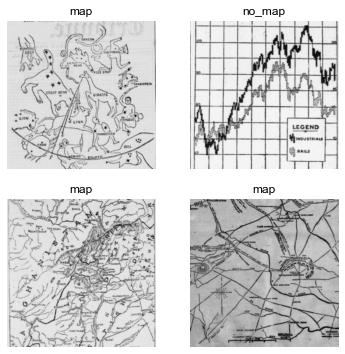

In [273]:
dls.show_batch()

We now have the data in a form that fastai can understand, next we need to create a model for training a image classification model. One way to do this is to use [`cnn_learner`](https://docs.fast.ai/vision.learner#cnn_learner). This will create a ["Convolutional Neural Network"](https://en.wikipedia.org/wiki/Convolutional_neural_network) model for us. We need to tell this function what data we want to train the model on, and the model 'architecture' we want to use, in this case we use a `resnet18` a model architecture that does well on a range of computer vision tasks, and which is relatively quick to train. Since we also want to now how well or model is doing we pass in a metric to track, in this case accuracy. We store the `cnn_learner` inside a variable `learn`

In [274]:
learn = cnn_learner(dls, resnet18, metrics=[accuracy])

At this point we have used fastai to create a model which will be trained on the training data stored in `dls`. We haven't actually trained the model yet. We can do this in various ways, we'll use the `fit_one_cycle` function. 

In [275]:
learn.fit_one_cycle(10)

Our model isn't doing great. We probably aren't very confident that these 20 maps are going to represent all of the variety of maps we might be dealing with. We'll return to training a model with a little bit more data, further below. 

# (SKIP THIS) 🧙🏽‍♀️ Code reuse 
One of the complaints sometimes made against notebooks is that it makes it more difficult to reuse code. We can however, create functions and reuse them as we would in normal python code. Since we may want to create annotations mutiple times we can make a function which setups the annotations for a given set of `images`, `labels` and `num_annotations`

In [15]:
def setup_annotations(images, labels, num_annotations):
    from pigeonXT import annotate
    from IPython.display import display, Image
    return annotate(
      images[:num_annotations],
      options=labels,
      display_fn=lambda filename: display(Image(str(filename),width=300,height=200))
    )

We can now use this function to setup new annotations. This time we'll be a little less lazy and annotate `200` examples and see how well our model does now. If you don't feel like annotating you can download some prepared examples further below.

In [16]:
annotations = setup_annotations(image_annotate, ['map','no_map'],num_annotations=200)

HTML(value='0 of 200 Examples annotated, Current Position: 0 ')

Output()

We could also do the same for our processing of the dictionaries into a DataFrame. 

In [ ]:
#df_labels = pd.DataFrame({'fname':list(annotations.keys()), 'label':list(annotations.values())})
df_labels = annotations

We can again make this into a function so we can reuse this code. 

In [ ]:
#export 
def anno2df(annotations):
    """returns annotations from pigeon as a Pandas Dataframe"""
    return pd.DataFrame({'fname':list(annotations.keys()), 'label':list(annotations.values())})

# (CONTINUE HERE) 🧙🏽‍♀️ Code reuse 

The reason some time in spent showing this is that one of the reasons we may want to use notebooks is to make methods more accessible for people with less experience coding. This is made slightly more tricky if these notebooks end up including walls of code. By wrapping up some of this code in functions we can choose to 'hide' some of the details if we plan to use notebooks as an interface for end users. 

## 📸 Creating a better model 

Our first attempt at 20 labels was perhaps a bit optimistic. If you don't want to do your own annotations you can download some already prepared annotations. 

In [24]:
!wget -O map_labels.csv https://zenodo.org/record/4156510/files/map_labels.csv?download=1

--2020-11-05 11:08:05--  https://zenodo.org/record/4156510/files/map_labels.csv?download=1
Resolving zenodo.org (zenodo.org)... 137.138.76.77
Connecting to zenodo.org (zenodo.org)|137.138.76.77|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 22267 (22K) [text/plain]
Saving to: ‘map_labels.csv’

map_labels.csv      100%[===================>]  21.75K  --.-KB/s    in 0.04s   

2020-11-05 11:08:06 (610 KB/s) - ‘map_labels.csv’ saved [22267/22267]



We'll load these 200 labels into a dataframe

In [25]:
df_labels = pd.read_csv('map_labels.csv')

and create a new fastai dataloader

In [30]:
dls = ImageDataLoaders.from_df(df_labels, fn_col='fname', 
                               label_col='label',
                               valid_pct=0.3, 
                               item_tfms=Resize(256),
                               bs=32)

We'll repeat the steps above, except this time we'll use a `resnet34` model, and also print out metrics for `F1` score

In [31]:
learn = cnn_learner(dls, resnet34, metrics=[F1Score(),accuracy])

We can also try a slightly different approach to training the model. 

In [32]:
# BE PATIENT HERE
learn.fine_tune(3, 1e-3, freeze_epochs=5)

This looks much better!

## 📸 Looking at our results

By increasing our labels to 200 we are doing much better. Annotating these 200 labels doesn't take very long and shows that even with relatively few labels we can often (not always) already create useful models without a huge amount of training data. We can also inspect the examples our model got wrong using some functionality from the fastai library.

In [281]:
interp = ClassificationInterpretation.from_learner(learn)

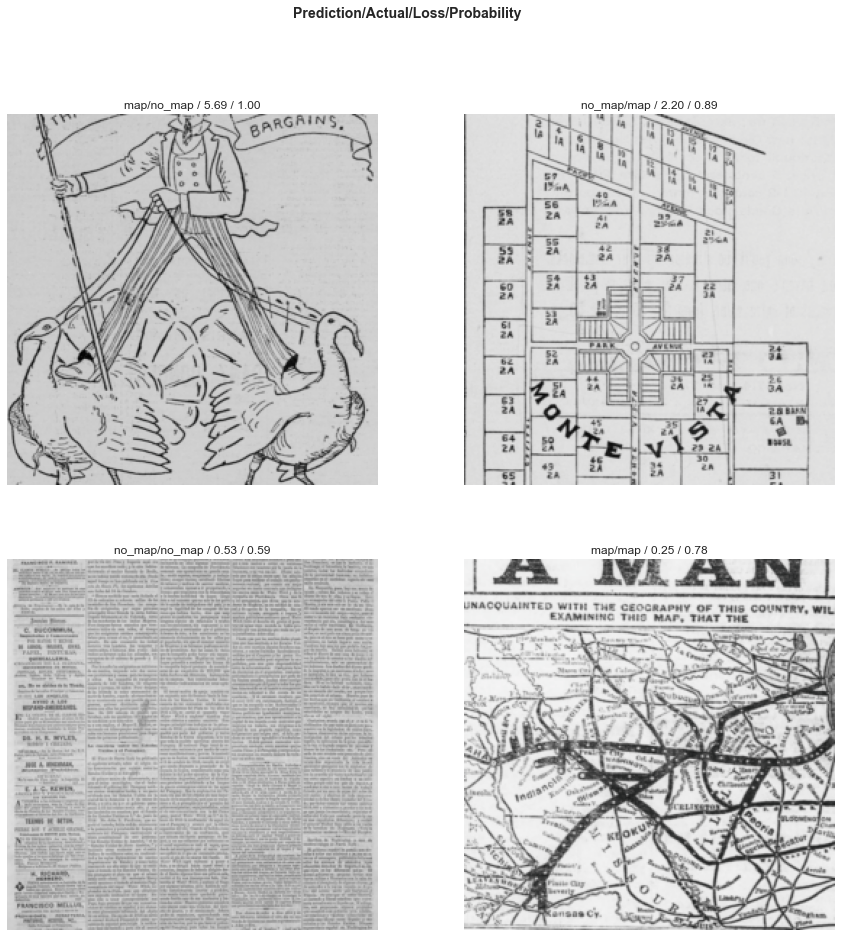

In [282]:
interp.plot_top_losses(4,figsize=(15,15))

It can be very useful to not only look at the metrics but also look at which images your model is making mistakes on. Some of the mistakes might be ones which are reasonable for a model to make. 

## 🤖 Inference (predicting on new images) 

We may want to share our model to allow others to use it. There are different ways in which we could do this. We'll have a look at an approach to making predictions one item at a time. Again we import a few new things

We'll import `requests`, a python library for making web requests. We can use this to pull data from urls. The other things we'll import are from Ipython and can be used to display our images.

In [17]:
import requests
from IPython.display import display, Image

We used some widgets before, we can look at a new one which is used to get text input from a user. 

In [18]:
url_input = widgets.Text()

So we have a url handy...

In [19]:
url = 'https://news-navigator.labs.loc.gov/data/vi_blass_ver01/data/sn84024735/0041566431A/1850083001/0476/000_2_98.jpg'

If we call `url_input` we get a text input box

In [20]:
url_input

Text(value='')

We'll paste our url text into the box. We may also want some way of loading images from a URL. 

In [21]:
def load_image(url):
    with requests.get(url) as r:
        img = PILImage.create(io.BytesIO(r.content))
    return img

We can access the input text from the text widget by using the `value` attribute. 

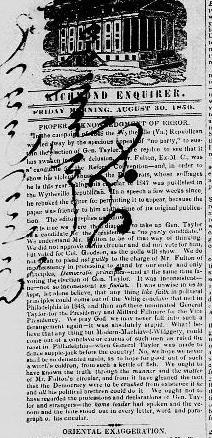

In [22]:
load_image(url_input.value)

To predict this image we can use our trained model `learn` and use the `predict` method. We'll give our loaded image as an input to this model. 

In [36]:
image = load_image(url_input.value)
pred,pred_idx,probs = learn.predict(image)
print(pred, pred_idx, probs)

no_map tensor(1) tensor([0.0159, 0.9841])


We could 'wrap' this up to make it more seamless, i.e. to present a user with a single button to input a url or upload an image. We won't have time to explore this fully today but you may want to explore [Voilà](https://voila.readthedocs.io/en/stable/using.html#as-a-standalone-application) a tool for turning notebooks into applications. These tools are particularly nice because they ease the transition from exploration to 'deployment' of a model in a format that can be used by other people. 

## (END HERE) 🤖 Using International Image Interoperability Framework (IIIF) to predict maps at scale

We now have a model that does a pretty good job of predicting if an image predicted as a map in the Newspaper Navigator dataset is a map, how could we use this 'at scale'. One approach is to download all of the map images we want to work with. Since we already have some images, we can calculate roughly how much storage this will require. 

We can again use the magic of `!` to use a command line tool, in this case [`ls`](https://en.wikipedia.org/wiki/Ls) plus the `lh` flag to get the file size. We can pass variables from Python into this bash environment by using `{}`. In this case we get one image and ask for the file size

In [24]:
!ls -lh {images[0]}

-rw-r--r--  1 dvanstrien  783425733   5.4M 30 Oct 13:18 newspaper_maps/dlc_fairymoss_ver01_data_sn83030313_00271743737_1871030501_0687_000_2_99.jpg


We can see this image is `5.4MB`. If we naively assume that all of the images are this size we can multiply this image by the size of all the items predicted as maps and divide by 1024 to get the value in GB

In [1]:
(5.4 * 200188) /1024

1055.6789062500002

So if we wanted to download all of the images and then predict we'd need around 1TB of storage. This isn't super huge but also isn't something to take for granted. For this sample the images were already resized so in reality the images would require more than this amount of storage.

### IIIF 
We don't actually want local copies of all the images, we just want to know if the image contains a map, or no map. Storage is one early potential challenge of trying to work at scale, particularly since we want our images/other data to be available where our analysis and/or machine learning model is. 

One potential solution to this challenge is to use IIIF. There are lots of reasons IIIF is a nice option: 

- A predicable [api](https://iiif.io/api/image/3.0/) makes it easy to work across collections without having to change a lot of code
- More and more libraries already have (or are implementing) IIIF endpoints e.g. https://github.com/IIIF/awesome-iiif/blob/master/implementations.md
- IIIF servers are designed to serve images efficiently and handle multiple requests (we should still be considerate in how we make these requests though) 
- We can make IIIF requests in a format that works for our model.

Let's load a prepared sample of the Newspaper Navigator JSON, which also includes IIIF urls for the maps images.  

In [33]:
import pandas as pd
df = pd.read_json('https://gist.githubusercontent.com/davanstrien/4641ed443d01d77799d14c4fd6583de8/raw/7dba20dff312b192a3b89b616fd0e3012e13ee5c/2020_01_11_11_19_969_sample.json')

We can see how many potential images we have in this dataset

In [5]:
len(df)

969

Let's also look at one of the IIIF urls.

In [60]:
url = df['iiif_url'][71]
url

'https://chroniclingamerica.loc.gov/iiif/2/iune_headline_ver02%2Fdata%2Fsn84038364%2F00295872901%2F1865091901%2F0054.jp2/pct:80.47,15.62,13.58,28.77/!500,500/0/default.jpg'

IF you are familiar with the IIIF request format, you may notice that in this request we can grab the parts of the image which the Newspaper Navigator dataset has predicted as being 'visual content' and a map. We can load the url as it is 

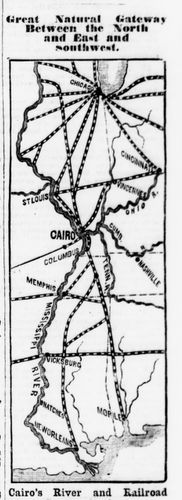

In [61]:
load_image(url)

If we split the URL on '/'

In [62]:
url.split('/')

['https:',
 '',
 'chroniclingamerica.loc.gov',
 'iiif',
 '2',
 'iune_headline_ver02%2Fdata%2Fsn84038364%2F00295872901%2F1865091901%2F0054.jp2',
 'pct:80.47,15.62,13.58,28.77',
 '!500,500',
 '0',
 'default.jpg']

We can see components which build up a IIIF url. Of particular interest is the `pct` part. Looking at the IIIF api guidance https://iiif.io/api/image/3.0/#41-region we can see that this refers to an image region. 

If we replace the pct with `full` we get

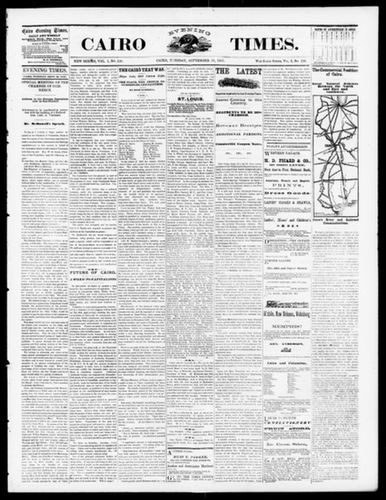

In [63]:
load_image('https://chroniclingamerica.loc.gov/iiif/2/iune_headline_ver02%2Fdata%2Fsn84038364%2F00295872901%2F1865091901%2F0054.jp2/full/!500,500/0/default.jpg')

You can see that this is the full newspaper image. This is one of the very nice features of IIIF for doing inference, since we can use existing information, in this case from the Newspaper Navigator dataset, as a starting point without having to create a copy of all of this data. IIIF also allows us to control the size of image we request

In [65]:
load_image('https://chroniclingamerica.loc.gov/iiif/2/iune_headline_ver02%2Fdata%2Fsn84038364%2F00295872901%2F1865091901%2F0054.jp2/pct:80.47,15.62,13.58,28.77/!50,50/0/default.jpg')

This time we replace the size requested section of the URL from `'!500,500'` to `!50,50`, and get back a much smaller image. Since the image size is a potential parameter we might want to control when building image classification models, it's super helpful that we can control this within the IIIF request URL. 

## ‼️ Dealing with missing images
One slight challenge of doing our predictions in this way is that we may sometimes request an image that isn't available. This could be because for some reason it hasn't been included in the IIIF collections, or because we have a temporary network issue etc. We need to account for this when we try and load our image. A fairly simple way to do this is to adapt our previous `load_image` command to include a try/except block. 

If you aren't familiar with Python/coding a try/except block as the name suggests, is a way in which you can deal with failure in your code, by trying to do something, and 'excepting' a potential outcome. You can deal with this in different ways in this case we'll just say that the image is `None`

In [68]:
import PIL

In [69]:
def load_image(url):
    with requests.get(url) as r:
        try:     
            img = PILImage.create(io.BytesIO(r.content))
        except PIL.UnidentifiedImageError:
            img = None
    return img

We're almost to the point we can start predicting at scale, on more small digression...

In [70]:
from tqdm.auto import tqdm

## 🤖 A small love letter to progress bars 

It is probably not a surprise that working with larger collections of images takes longer. When things take a few seconds we don't necessarily need to know if it's going to take two seconds or 1 second. However when things start taking minutes, hours or days it might be nice to get an ETA on when things are going to be finished. 

One way of getting some estimated time remaining is to use a progress bar. There are different options available in Python but one nice option is [tqdm](https://github.com/tqdm/tqdm). It is simple to use to start with but also includes options to customize how it works if you need more flexibility. To get started with tqdm you can 'wrap' it around any iterable (something you can loop over in Python). You can also pass in a variable `total` if you know how many total items are to be processed. 

Although using tqdm might not be so important in this example it can be useful for giving you some sense of how long something will take, and potentially stopping things early if you think it's running to slowly.

## 🤖 Making predictions from our DataFrame 

In this next section we see one possible way of combining what we have already seen to run predictions at scale. This example isn't intended to be fully optimized but is intended to illustrate a simple approach to using IIIF to make predictions using our image classifier. 

*note* this is intended as an example of how IIIF can be used for inference, it is not intended to be a best approach. 

In [71]:
preds = [] # we create a list to store our predictions 
for t in tqdm(df.itertuples(), total=len(df)): # we loop through our dataframe one row at a time
    url = t.iiif_url # we get the iiif url for each row
    im = load_image(url) # we try and load an image from this url
    if im: # if we get back an image we use our model to make a prediction 
        with learn.no_bar():
            pred, *_ = learn.predict(im)
    else: # if we don't get an image we print the url 
        tqdm.write(f'no image found at {url}')
        pred = np.NaN # and assign NaN for that image (i.e a missing value)
    preds.append(pred) # we add our prediction to the predictions list

no image found at https://chroniclingamerica.loc.gov/iiif/2/dlc_belmont_ver02%2Fdata%2Fsn82014511%2Fno%2Freel%2F1860033101.jp2/pct:33.71,3.46,40.81,17.48/!500,500/0/default.jpg
no image found at https://chroniclingamerica.loc.gov/iiif/2/dlc_halsted_ver02%2Fdata%2Fsn82014064%2Fno%2Freel%2F1865012801.jp2/pct:12.78,2.49,21.14,31.57/!500,500/0/default.jpg
no image found at https://chroniclingamerica.loc.gov/iiif/2/dlc_north_ver02%2Fdata%2Fsn84031492%2Fno%2Freel%2F1880050101.jp2/pct:70.97,2.98,26.76,35.68/!500,500/0/default.jpg
no image found at https://chroniclingamerica.loc.gov/iiif/2/dlc_north_ver02%2Fdata%2Fsn84031492%2Fno%2Freel%2F1880030101.jp2/pct:70.46,4.79,27.98,34.59/!500,500/0/default.jpg
no image found at https://chroniclingamerica.loc.gov/iiif/2/mimtptc_alpena_ver01%2Fdata%2Fsn2006060001%2F00296023310%2F1890091201%2F0306.jp2/pct:65.35,57.95,28.03,17.53/!500,500/0/default.jpg
no image found at https://chroniclingamerica.loc.gov/iiif/2/ak_harborseal_ver02%2Fdata%2Fsn2008058232%2F

As you can see we get some images where for some reason the IIIF url doesn't return an image. If an image is available we pass it into our learner to make a prediction, if it isn't available we create a prediction of `np.NaN`. We can then easily exclude these missing images later on.

The total time to run prediction on ~1000 images is 10 mins or so. 

‼️ Although IIIF servers are designed to handle high request volumes, we shouldn't 'spam' them with multiple repeated requests. If you are likely to need to make prediction multiple time on the same image you should consider downloading them locally one time, or caching them in some other way. 

We can peek into our list of predictions. 

In [302]:
preds[:10]

['no_map',
 'map',
 'no_map',
 'no_map',
 'no_map',
 'no_map',
 'no_map',
 'no_map',
 'no_map',
 'no_map']

We can append this list to our previous dataframe. This will give us the original metadata along with the predicted labels from our model.  

In [303]:
df['label'] = preds

If you didn't run the predictions above, you can use the cells below to download some data created earlier. 

In [73]:
df = pd.read_json('https://gist.githubusercontent.com/davanstrien/87e1b42f65090aed73cf79b056f8ac23/raw/7c73864e201b7fcfda2c7a50b5cc5cba30197476/map_preds_1000.json')
df.head(1)

filepath  \
0  vi_blass_ver01/data/sn84024735/0041566431A/1850083001/0476/000_2_98.jpg   

     pub_date  page_seq_num  edition_seq_num           batch        lccn  \
0  1850-08-30           476                1  vi_blass_ver01  sn84024735   

                                                                box     score  \
0  [0.011002250600000001, 0.0528974549, 0.1976100607, 0.3006176606]  0.982224   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       ocr  \
0  [PROPERN, QjOEDO^liiLr, OF, ERROR., Iijftho, campalgfjfr<ff8, Hit-, JVytheJlle, (Va.), Republican, led, |wny, by, the, specious, k>peijfof, "nu, party,", to, sua, fn, tht'tlection, ufG.-n., Taylor^, hus, awoken, ?%, b*, cand'inne, /show, hie, violei, he, Is, this, year, 1, the, Wytheville, rejoice, to, Hce, thai, it, Fulton,, Ex-M., C.t, was, ?nti>m?unci,, in, order, to, rats,, whose, suffrages, 1547, was, published, in, ;, delusion,, Refo, busjg^the, is, Republican,, fin, a, speech, a, few, weeks, since, he, rebuked, the, Aitor, for, permitting, it, to, appear,, because, the, paper, wo*, ...   

  place_of_publication             geographic_coverage  \
0        Richmond, Va.  [Virginia--Richmond--Richmond]   

                          name       publisher  \
0  Richmond enquirer. [volume]  Thomas Ritchie   

                                                                                                                url  \
0  https://news-navigator.labs.loc.gov/data/vi_blass_ver01/data/sn84024735/0041566431A/1850083001/0476/000_2_98.jpg   

                                                                                                         page_url  \
0  https://chroniclingamerica.loc.gov/data/batches/vi_blass_ver01/data/sn84024735/0041566431A/1850083001/0476.jp2   

                                                                                                                                                             iiif_url  \
0  https://chroniclingamerica.loc.gov/iiif/2/vi_blass_ver01%2Fdata%2Fsn84024735%2F0041566431A%2F1850083001%2F0476.jp2/pct:1.1,5.29,18.67,24.78/!500,500/0/default.jpg   

                                                       download_image_path  \
0  vi_blass_ver01_data_sn84024735_0041566431A_1850083001_0476_000_2_98.jpg   

    label  
0  no_map

# 🤖 Working with predictions

This next section shows some of the possible things we could now explore using the predicted labels in combination with existing metadata/data in the collections. 

At the moment we have a single column for our maps labels, we can convert this into `one hot encoded` labels in pandas. This will give back new columns for each potential label with a `1` if the label is present and a `0` if it isn't 

In [74]:
df[['map', 'no_map']] = pd.get_dummies(df['label'])

In [75]:
df[['map', 'no_map']]

map  no_map
0      0       1
1      1       0
2      0       1
3      0       1
4      0       1
..   ...     ...
964    0       1
965    1       0
966    0       1
967    0       1
968    0       1

[969 rows x 2 columns]

Now we have improved (but not fully corrected) whether a map is in the image or not so one thing we may want to do is to apply our new model's prediction as a filter and create a new dataframe to only include images where our model predicted a map. 

In [76]:
maps_only = df[df['map'] == 1]

We can take a look at this dataframe

In [77]:
maps_only.head(2)

filepath  \
1   dlc_crunchy_ver01/data/sn83030213/00206530303/1850041601/0654/000_2_97.jpg   
47   pst_fenske_ver02/data/sn85055197/00280776361/1855100501/0510/000_2_99.jpg   

      pub_date  page_seq_num  edition_seq_num              batch        lccn  \
1   1850-04-16           654                1  dlc_crunchy_ver01  sn83030213   
47  1855-10-05           510                1   pst_fenske_ver02  sn85055197   

                                                                box     score  \
1          [0.4977955174, 0.0196753023, 0.6696964986, 0.3003353426]  0.976809   
47  [0.2233422937, 0.0794103158, 0.8344477324, 0.37380412290000004]  0.994873   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  ocr  \
1                                                                                                                                                                                                                                                                                                                                                                                                                                                             [th", .?!, M, sum., Wo]   
47  [fttap, of, Union, County, as, it, tacnlD, be, rait!), tlje, attrition, of, tl)e, upper, tnl, of, llortl)t.mIfrlan&., LYCOMING, CO., CLINTON, CO, It.,;, ,, Jf, H'rf.""tivr', ', I, 'MMM'', ', ., 't, v., CENTRE, CO, j, ,, MONTOL, i:, CO., 1, .A., 1, t, .l, n, I, -, J, it., :,nJ, .V, .ml, Tf'J-rfUuraue., 1, Ji'.fnifltij'H'nm, '1S.it, ...-""-r--!", ., -..J", f, r, f, mg0, v-, JUNIATA, CO., ", ffi, .-'C"', i, DAurniN, co., COLUMBIA, CO, MIFFLIN, CO, SCHUYLKILL, CO.]   

   place_of_publication               geographic_coverage  \
1       New-York [N.Y.]    [New York--New York--New York]   
47       Lewisburg, Pa.  [Pennsylvania--Union--Lewisburg]   

                                name           publisher  \
1   New-York daily tribune. [volume]  Greeley & McElrath   
47     Lewisburg chronicle. [volume]         H.C. Hickok   

                                                                                                                    url  \
1   https://news-navigator.labs.loc.gov/data/dlc_crunchy_ver01/data/sn83030213/00206530303/1850041601/0654/000_2_97.jpg   
47   https://news-navigator.labs.loc.gov/data/pst_fenske_ver02/data/sn85055197/00280776361/1855100501/0510/000_2_99.jpg   

                                                                                                             page_url  \
1   https://chroniclingamerica.loc.gov/data/batches/dlc_crunchy_ver01/data/sn83030213/00206530303/1850041601/0654.jp2   
47   https://chroniclingamerica.loc.gov/data/batches/pst_fenske_ver02/data/sn85055197/00280776361/1855100501/0510.jp2   

                                                                                                                                                                  iiif_url  \
1   https://chroniclingamerica.loc.gov/iiif/2/dlc_crunchy_ver01%2Fdata%2Fsn83030213%2F00206530303%2F1850041601%2F0654.jp2/pct:49.77,1.97,17.2,28.07/!500,500/0/default.jpg   
47  https://chroniclingamerica.loc.gov/iiif/2/pst_fenske_ver02%2Fdata%2Fsn85055197%2F00280776361%2F1855100501%2F0510.jp2/pct:22.33,7.95,61.12,29.44/!500,500/0/default.jpg   

                                                           download_image_path  \
1   dlc_crunchy_ver01_data_sn83030213_00206530303_1850041601_0654_000_2_97.jpg   
47   pst_fenske_ver02_data_sn85055197_00280776361_1855100501_0510_000_2_99.jpg   

   label  map  no_map  
1    map    1       0  
4

We could use other parts data available to us to further filter images which we're fairly sure are maps. As an example we could look for maps where the `place_of_publication` field contains 'Washington'. 

In [79]:
maps_only[maps_only['place_of_publication'].str.contains('Washington', case=False)].head(5)

filepath  \
275         dlc_ike_ver01/data/sn85042682/00211103383/1885050301/0029/000_2_99.jpg   
330  dlc_otterhound_ver01/data/sn83045462/00280654784/1890101801/0121/002_2_95.jpg   
348    dlc_franklin_ver01/data/sn82016187/00211102949/1890102301/0594/000_2_99.jpg   
361  dlc_otterhound_ver01/data/sn83045462/00280654760/1890042601/0180/002_2_96.jpg   
379    dlc_havanese_ver01/data/sn83045462/00280655016/1895080501/0280/000_2_99.jpg   

       pub_date  page_seq_num  edition_seq_num                 batch  \
275  1885-05-03            29                1         dlc_ike_ver01   
330  1890-10-18           121                1  dlc_otterhound_ver01   
348  1890-10-23           594                1    dlc_franklin_ver01   
361  1890-04-26           180                1  dlc_otterhound_ver01   
379  1895-08-05           280                1    dlc_havanese_ver01   

           lccn  \
275  sn85042682   
330  sn83045462   
348  sn82016187   
361  sn83045462   
379  sn83045462   

                                                                       box  \
275        [0.38947436830000004, 0.1127245845, 0.6120585531, 0.3886068911]   
330               [0.0265245877, 0.0236367522, 0.2895626774, 0.2240184915]   
348  [0.16670141400000002, 0.29076436910000003, 0.425798381, 0.4581402191]   
361         [0.4254094876, 0.0163184168, 0.8322530622000001, 0.0943798679]   
379       [0.0314055293, 0.020194051100000002, 0.4259529573, 0.6140071226]   

        score  \
275  0.990787   
330  0.958147   
348  0.990737   
361  0.968969   
379  0.998868   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               ocr  \
275  [GftOPLAH, S:Al, e, Chsush, Mlcs., .tA-tr, r, e, w, -tSkv, yc, l, aSn,, """PliL, 1, s, 1, i, j, 3,, -r, tr, ., I, X, r, ict-A'K, TUX, t, rtpairtir-Ailxo, I, J, -, olSAni'yAHi, -, 1', (, 'J, S, Jxy-K, YZMM-K-MM, y, I, iftLl-l, KHIS, TI, )), si7s, ZfWSAD, a, ?, C3, sPltMKUllL, III, TrffatlrCMH, r-f, I', lyU-, pr, vT, JJ, Ire, fix, sy, ", ,ijicll, 9, s, SSI, !C, CTBUA-HonCHAlt, cSk-"-f--, A, "iF., S, (, I, FN, N-, v, ', ''-)., j1iriMCJ, J, V, V., v, ih"''rr,A'M'fs, 7?, v., x, V, I, J--S:---ev''', "";, "i, c, z, c, -., ...]   
330                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             []   
348                                                                                                                                                                                                                                          [", ZTORTUGA, ID., '", 20, C, ts, h, "So, DEVIL'S, PT-Cy, 9"5, y-, Cl, CAPESTMARCCL, JfZ,rnr.., wj, J, yQAfllEBELAIS., -, -a., G.COZU.VETTA., J, "J, L---', v, 4598, Tt., ,.,..,, I, ", w, V, ?LES, CAYEST-, 90ACWcT., -v, 5-, ), 0La, VacheId., -", y, I-IAYTI., P-, SO, Miles., j, 1, i, I, -, 5F.]   
361                                                                                                                                                                                                                                                                                                          

Now we may have reduced the number of maps to a number which is small enough that we might want to look at them individually. We can put all of the urls for these images in a list, and put it in a new variable `washington_maps`

In [80]:
washington_maps = maps_only[maps_only['place_of_publication'].str.contains('Washington')]['iiif_url'].to_list()

We can use the same approach we used to look at our files earlier in the notebook to load these urls.

In [81]:
@interact
def show_images(url=washington_maps):
    display(Image(url,width=400,height=400))

interactive(children=(Dropdown(description='url', options=('https://chroniclingamerica.loc.gov/iiif/2/dlc_ike_…

### Finding maps in the OCR

We could also look for maps where 'map' is mentioned in the ocr text. 

In [82]:
map_maps = maps_only[maps_only['ocr'].apply(lambda x: x[0] if x else x).str.contains('map', case=False) == True]['iiif_url'].to_list()

In [83]:
@interact
def show_images(url=map_maps):
    display(Image(url,width=400,height=400))

interactive(children=(Dropdown(description='url', options=('https://chroniclingamerica.loc.gov/iiif/2/vi_chane…

## Using our initial classifier as a prompt for further questions 

Using our initial classifier to filter out some 'not maps' we reduce the amount of images we have to look at which don't actually fit what we want to explore, i.e. maps in newspapers. We can in this case combine our new information/labels with existing information to filter down further. Both of these techniques allow us to potentially use this new collection of images as a starting point for further exploration of the maps in newspapers. We may at some point reduce the images down to a number we are happy to review 'by hand'. At this point we have started by working 'at scale' but have done so in a way that allows us to get back to a small enough collection that we can use other close reading techniques etc. to work with out material. 

An alternative is to use these images, as a starting prompt for new questions, for example we may consider that although we have narrowed down images to mostly contain only maps, we still have a variety in these maps. We may therefore want to see if we can build an additional classifier to predict if these maps are 'weather maps', 'military maps', 'commercial'. These labels will depend on our question but potentially offer another way of categorizing these items into different categories. Choosing the most appropriate labels will not always be easy, and this is where a good amount of the work in using these techniques will be. 

## 🤖 Working with labels at scale

We may want/need to continue to work at a scale which no longer allows us to view each image we are working with. This poses some new challenges, since although we are working with visual material, we may only work with images in a mediated way through the labels we predict using computer vision, the existing metadata we have available to us and any other sources of data we can combine with our images. Below we explore very briefly some potential things we may ask when we can no longer 'view' each image. To help us do this we'll download a previously created DataFrame with 10,000 images i.e. too many to look at 'by hand' (unless you are very patient...)

In [85]:
df = pd.read_json('https://gist.githubusercontent.com/davanstrien/f92d936850b12bb6a6ed977e7f265cbe/raw/d703c6ff232995e53173659f8290c2ba2781930d/map_preds_10000.json')
df.head(3)

filepath  \
165489      dlc_1freud_ver01/data/sn83045462/00280601445/1935030201/0321/017_2_95.jpg   
175649  dlc_1oldenburg_ver01/data/sn83045462/00280602139/1939120301/0339/001_2_90.jpg   
159890    in_ingersoll_ver01/data/sn82015313/00383349485/1933012701/0387/001_2_90.jpg   

          pub_date  page_seq_num  edition_seq_num                 batch  \
165489  1935-03-02           321                1      dlc_1freud_ver01   
175649  1939-12-03           339                1  dlc_1oldenburg_ver01   
159890  1933-01-27           387                1    in_ingersoll_ver01   

              lccn  \
165489  sn83045462   
175649  sn83045462   
159890  sn82015313   

                                                                          box  \
165489         [0.1456127969, 0.0747691945, 0.8645722719000001, 0.4054542635]   
175649               [0.4928070389, 0.0261111527, 0.9825625336, 0.2329105393]   
159890  [0.0359269646, 0.16939016410000002, 0.9604958698, 0.9163863481000001]   

           score  \
165489  0.951634   
175649  0.907281   
159890  0.900901   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            ocr  \
165489  [Upper, left:, Home, of, Dr., and, Mrs., Earl, R., Templeton, at, 4520, Edmonds, street,, in, the, Foxhall, road, section., The, home,, contain, ing, nine, rooms, and, four, baths,, was, purchased, from, Phillips, &, Canby,, realtors., Upper, right:, Purchased, I, by, Mr., and, Mrs., Owen, S., Davis,, jr.,, j, from, the, firm, of, L., E., Breuninger, I, &, Sons,, this, house, at, 7809, Six, |, teenth, street,, contains, seven, rooms, and, two, baths., It, is, English, in, de, !, sign., Below:, Bungalow, at, 4815, Leland, streets,, Chevy, Chase,, Md.,, bought, by, Mr., and, Mrs., Albert, B....   
175649                                                                                                                                                                                                                                                                                                                                                                                                                                          [Pick, your, bird!, You, can't, stump, Hollywood., It, needed, a, neck-and-neck, ostrich, race, as, background, for, a, picture, of, South, African, locale—and, produced, it.]   
159890                                                            [Hr, ", '-?'i, TF, H, Hj, :, F, 'JS, '’#, %i\, '’TSS, **|..*, ., \.v, y:U-<m-4mMm, jg, H, *, j|-, (, ,, ,, t, MB, m, REM, „, nnn, t®, •j&, v, ~v, ;, ’,, %v, -, t?., ■’, /,-, An, army, sallies, forth, to, shop, tomorrow!, \, /, Go, through, tonight, s, Times!, Check, the, \, 011, TiS, DR, A, V, /, many, offerings, against, your, list, of, needed, Thrifty, housewives, by, the, thousand, greet, \, |, UIILI/VT, j, articles., The, Times, Opportunity, Day, with, frank, \, EKftl, AA, /, ., ~.., .., enthusiasm!, A, great, day, to, supply, ...]   

       place_of_publication                 geographic_coverage  \
165489     Washington, D.C.  [District of Columbia--Washington]   
175649     Washington, D.C.  [District of Columbia--Washington]   
159890  Indianapolis [Ind.]     [Indiana--Marion--Indianapolis]   

                                    name                     publisher  \
165489            Evening star. [volume]           W.D. Wallach & Hope   
175649            Evening star. [volume]           W.D. Wallac

One difference in this DataFrame is that it includes the prediction probability for each image, in this case 'map' or 'not_map'

In [87]:
df.columns

Index(['filepath', 'pub_date', 'page_seq_num', 'edition_seq_num', 'batch',
       'lccn', 'box', 'score', 'ocr', 'place_of_publication',
       'geographic_coverage', 'name', 'publisher', 'url', 'page_url',
       'iiif_url', 'label', 'map_prob', 'no_map_prob'],
      dtype='object')

## Most confident map predictions 

Since we also have the label probabilities in this DataFrame we can sort by labels confidence

In [88]:
df.sort_values('map_prob',ascending=False).head(5)

filepath  \
46937     dlc_alicanto_ver02/data/sn82016187/00222252131/1906031501/0536/000_2_98.jpg   
52761     mthi_harrier_ver01/data/sn84036207/00295860182/1908040101/0532/004_2_96.jpg   
18235  dlc_ibizanhound_ver01/data/sn83045462/0028065503A/1895111601/0054/002_2_97.jpg   
43354      curiv_felix_ver01/data/sn85066387/00100480670/1905082601/0497/000_2_99.jpg   
11380   khi_brockovich_ver02/data/sn83045789/00237281949/1886052801/0507/000_2_98.jpg   

         pub_date  page_seq_num  edition_seq_num                  batch  \
46937  1906-03-15           536                1     dlc_alicanto_ver02   
52761  1908-04-01           532                1     mthi_harrier_ver01   
18235  1895-11-16            54                1  dlc_ibizanhound_ver01   
43354  1905-08-26           497                1      curiv_felix_ver01   
11380  1886-05-28           507                1   khi_brockovich_ver02   

             lccn  \
46937  sn82016187   
52761  sn84036207   
18235  sn83045462   
43354  sn85066387   
11380  sn83045789   

                                                                         box  \
46937        [0.18605900490000002, 0.7354039258, 0.4370491859, 0.8323241656]   
52761  [0.19874818300000002, 0.5567486648000001, 0.4863286512, 0.7605290963]   
18235               [0.1426299152, 0.0216860021, 0.4277171925, 0.1976098711]   
43354        [0.052434942400000004, 0.3029920554, 0.959880308, 0.6509947372]   
11380         [0.5670371739, 0.113781689, 0.9651742719, 0.34834131700000004]   

          score  \
46937  0.985203   
52761  0.964325   
18235  0.979659   
43354  0.998579   
11380  0.985063   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 ocr  \
46937                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          [3.0]   
52761  [CONTROLLED, BY, RAILROAD, CZAR, VfCOWtR, JB, _, ,, .••Wâr, ;;:****, ~......, iPOHTUW, .*, *., *•••••, MIX, *■, ', '0./O.SHA, .............., *:, 'f, •.........--------------, V, **l, w, /T, *, 'jêtf!, SHEW, Lib, /, Am., /w/6, ILL, LÏ, _______, /, low, \, i................, y'n, A™, :, \, V....., ", %, 'hId., ...*•*, IL, ».J, ;, *»-, £Q], fCClMR, s', •, i, 'àv, ^, h, •, ricei., o, #,, **A*m, z, ITY, y, **, v, AR./, J, ..*"*, /7*, -•, ..*', __, .........................., /, /, s'*', m, m., *v:......, f, /, .....■, r.LPASo, ,JEX., \, /, V*, •Vauas, (, LA, HäLvcsjon, MEXICO, How, ...]   
18235                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          [DUr-onV, ??, Che*, the, new, Methodist, 

In [89]:
confident_maps = df.sort_values('map_prob',ascending=False).head(15)['iiif_url'].to_list()

In [90]:
@interact
def show_images(url=confident_maps):
    display(Image(url,width=400,height=400))

interactive(children=(Dropdown(description='url', options=('https://chroniclingamerica.loc.gov/iiif/2/dlc_alic…

We can also do the same for images which are confidently predicted as 'not maps' 

In [121]:
confident_not_map = df.sort_values('map_prob',ascending=True).head(15)['iiif_url'].to_list()
@interact
def show_images(url=confident_not_map):
    display(Image(url,width=400,height=400))

interactive(children=(Dropdown(description='url', options=('https://chroniclingamerica.loc.gov/iiif/2/dlc_1mir…

## Probabilities 

Although you can work directly with the predicted labels, it is useful to keep in mind that underlying these labels are probabilities. If we look at all of the labels where we have a map prediction and then use the pandas `describe` method we can see the mean, min etc. for the underlying label probabilities. 

In [120]:
df[df['label']=='map']['map_prob'].describe()

count    3540.000000
mean        0.849349
std         0.149092
min         0.500854
25%         0.747570
50%         0.908537
75%         0.977235
max         0.999958
Name: map_prob, dtype: float64

We can see here that there is some variation in how confidently labels are predicted. By default a label will be applied if it is above 50% probability but we may want to set a higher threshold. Lets take a look at examples which were predicted as maps but with the lowest confidence 

In [130]:
not_confident_maps = df[df['label']=='map'].sort_values('map_prob',ascending=True).head(15)['iiif_url'].to_list()
@interact
def show_images(url=not_confident_maps):
    display(Image(url,width=400,height=400))

interactive(children=(Dropdown(description='url', options=('https://chroniclingamerica.loc.gov/iiif/2/nn_odum_…

As you can see looking through these images, although some labels are maps we also have some examples where the label is incorrect. We may want to consider using a higher threshold or assessing these images to relabel them. 

### Looking at number of maps per years

In [155]:
df['pub_date'] = pd.to_datetime(df['pub_date'])

In [156]:
df['year'] = df['pub_date'].dt.year

In [157]:
df.groupby(['label', 'year']).size().unstack(fill_value=0)

year    1851  1854  1857  1858  1859  1861  1862  1863  1864  1865  ...  1946  \
label                                                               ...         
map        1     1     7     1     2     8    18    13    10     1  ...    14   
no_map     0     0     5     5     2     2     2     2     3     3  ...    89   

year    1947  1948  1949  1950  1852  1855  1856  1867  1868  
label                                                         
map       14     4    11    23     0     0     0     0     0  
no_map    75    57    78    90     1     1     4     2     2  

[2 rows x 98 columns]

### What day of the week do newspapers publish maps?
We could also consider whether there is any trend in what day of the week maps were published in newspapers

In [22]:
df = df[df['label'] == 'map']

<AxesSubplot:xlabel='pub_date'>

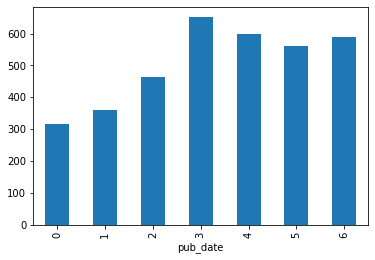

In [124]:
df.groupby(df.pub_date.dt.dayofweek).count()['label'].plot(kind='bar')

# Extending this to 'proper maps'

So far we've worked with a particular kind of map. For these maps which were printed on a newspaper page, working at the level of the image to assign labels largely makes sense. How does what we've done so far, classifying images, translate to working with 'proper maps'? Let's look at an example of a Ordinance Survey map

In [25]:
!wget -O 'map-1.png' https://gist.githubusercontent.com/davanstrien/c4f5e54663f3b8dd258bec7cce924a5c/raw/287000e7b08cf1608557ec5f805c5584e338b830/map-1.png

--2020-11-03 15:24:27--  https://gist.githubusercontent.com/davanstrien/c4f5e54663f3b8dd258bec7cce924a5c/raw/287000e7b08cf1608557ec5f805c5584e338b830/map-1.png
Resolving gist.githubusercontent.com (gist.githubusercontent.com)... 151.101.16.133
Connecting to gist.githubusercontent.com (gist.githubusercontent.com)|151.101.16.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2352875 (2.2M) [image/png]
Saving to: ‘map-1.png’

map-1.png           100%[===================>]   2.24M  6.42MB/s    in 0.3s    

2020-11-03 15:24:27 (6.42 MB/s) - ‘map-1.png’ saved [2352875/2352875]



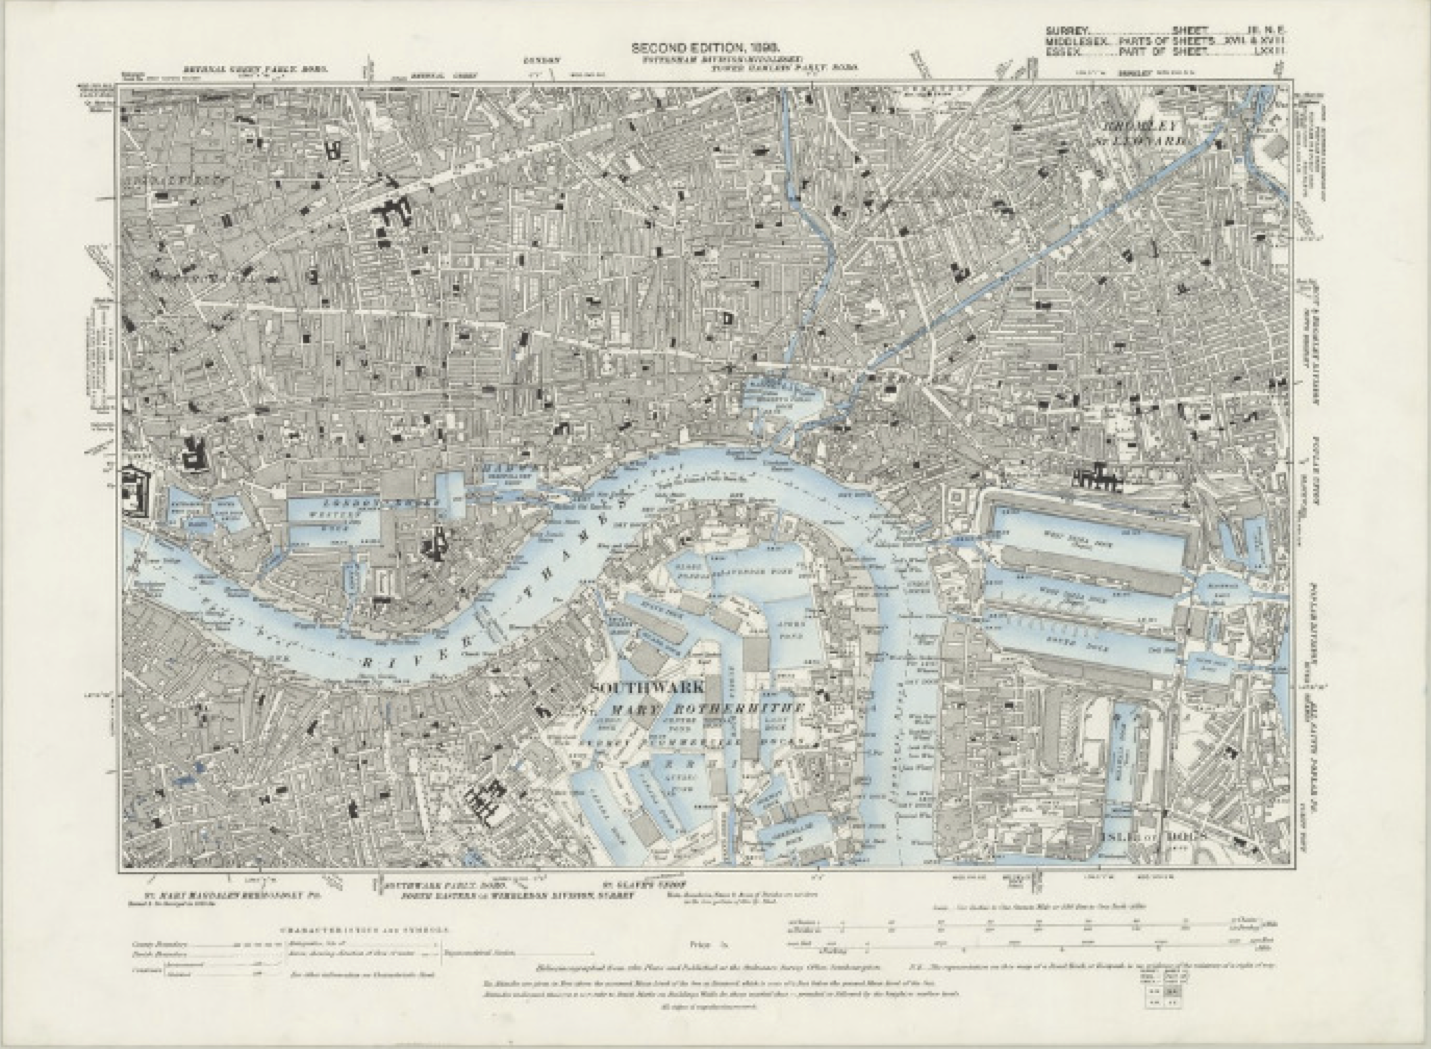

In [1]:
from PIL import Image, ImageDraw
im = Image.open('map-1.png')
im

>Map images and georeferencing data provided by the National Library of Scotland. This data is available for re-use under the Creative Commons Attribution Non-Commercial Share Alike 4.0 (CC BY-NC-SA 4.0) licence. For more information visitmaps.nls.uk. https://maps.nls.uk/view/101436346#zoom=4&lat=3284&lon=4779&layers=BT

## Tiling maps

So far we've been annotating at the level of a whole image, but what if our image is big? The map image above contains a lot of different 'types'. To assign the whole map as belonging to one class probably doesn't make much sense here. Let's quickly see how we can adapt what we've done so far to work with larger maps. First we'll install one more python package

In [25]:
!pip install -q image_slicer

Import our new package

In [59]:
from image_slicer import slice 

In [60]:
slices = slice('map-1.png', 12, save=False)

No we have a map which has been 'sliced' into 12 pieces. We now have the possibility of assigning labels to maps at a the tile level rather than at the whole map level. For example the tile below might be different from other tiles in the same map. 

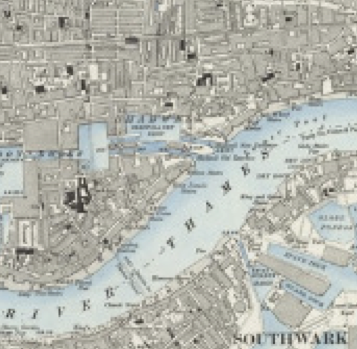

In [62]:
slices[5].image

We slightly adapt our previous code to work with the slices

In [48]:
def setup_annotations(images, labels, num_annotations):
    from pigeonXT import annotate
    from IPython.display import display, Image
    return annotate(
      images[:num_annotations],
      options=labels,
      display_fn=lambda filename: display(filename.image))

As a quick example we'll classify if there is water in the tile or not

In [68]:
annotations = setup_annotations(images=slices, labels=['water', 'no_water'],num_annotations=20)

HTML(value='0 of 12 Examples annotated, Current Position: 0 ')

Output()

Now, we use the same approach as before to train an image classifier which classifies image tiles from a map rather than a whole image. We could now start thinking about how to work with maps at scale. We could for example count how many map tiles have water

In [69]:
from collections import Counter

In [70]:
counts = Counter(annotations.values())
counts

Counter({'no_water': 3, 'water': 9})

In [71]:
import matplotlib.pyplot as plt

<BarContainer object of 2 artists>

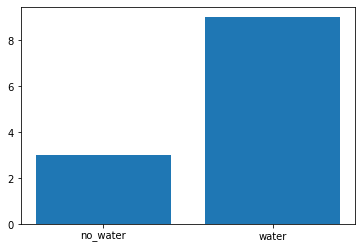

In [72]:
plt.bar(counts.keys(),counts.values())

### Scaling this to many maps

So far this isn't very useful, but when we scale to lots of maps, lots of labels and lots of other data points we may start to find more interesting results (we hope...) 

## Conclusion

This notebooks has provided a very surface level intro to a number of topics but hopefully gives a sense for how Jupyter notebooks and computer vision can be used to work with image collections at scale, both for research and for working with collections. 

## Further resources 

- More discussion of Living with Machines approach to working with maps can be found in:
    - https://livingwithmachines.ac.uk/using-hack-days-to-explore-maps-at-scale/
    - https://livingwithmachines.ac.uk/using-hack-days-to-explore-maps-at-scale-two-examples/
    - https://livingwithmachines.ac.uk/finding-words-in-maps/
    - https://livingwithmachines.ac.uk/finding-words-in-maps-part-2-seeing-the-results/
    - https://livingwithmachines.ac.uk/introducing-the-space-and-time-lab/
    - https://github.com/Living-with-machines/maps-at-scale-hack-day-notebooks

More resources on computer vision can be found in:
    - https://github.com/Living-with-machines/computer-vision-DHNordic-2020-workshop
    - [course.fastai.ai]()
    - a series of forthcoming programming tutorial lesson (soon hopefully) 

The love letter to Jupyter notebooks in this workshop was only partial, a fuller love letter can be found in the video below:

In [246]:
from IPython.display import HTML, IFrame

In [247]:
IFrame('https://www.youtube.com/embed/9Q6sLbz37gk',width="560",height="315" )